# Project 2

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
df_raw.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


###### Question 1a. How many observations are in our dataset?

In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

###### Question 1b. Can you ID the missing data?

In [4]:
df_raw [ df_raw['gre'].isnull() | df_raw['gpa'].isnull() | df_raw['prestige'].isnull() ]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


In [5]:
df = df_raw.dropna()

###### Question 2. Create a table of descriptive statistics for each of the variables (n, mean, median, standard deviation)

In [6]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [7]:
df.sum()

admit          126.00
gre         233380.00
gpa           1346.72
prestige       988.00
dtype: float64

###### Question 3: Describe the distributions of your data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1142366d8>,
      dtype=object)

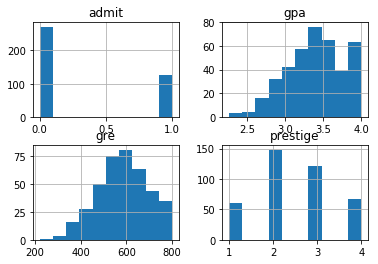

In [8]:
df.hist()

In [9]:
df.skew()

admit       0.787669
gre        -0.146047
gpa        -0.216889
prestige    0.086506
dtype: float64

In [10]:
df.kurt()

admit      -1.386588
gre        -0.332864
gpa        -0.563570
prestige   -0.901038
dtype: float64

*Based on the analysis above, the input covariates gre and gpa are shown to have the negative skew and kurtosis. The categorical prestige has a slight positive skew and high negative kurtosis.*

###### Question 4: Plot box plots for each variable

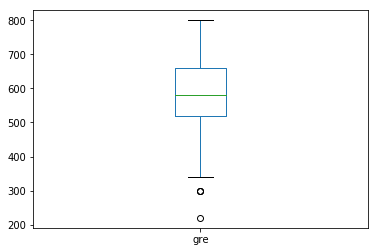

In [11]:
df['gre'].plot(kind='box')

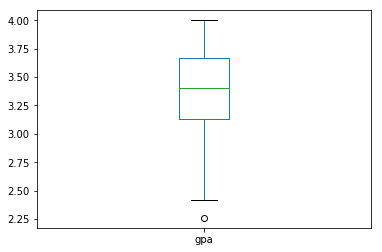

In [12]:
df['gpa'].plot(kind='box')

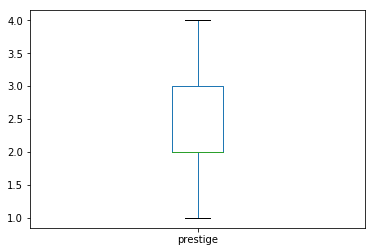

In [13]:
df['prestige'].plot(kind='box')

###### Question 5: Create a covariance matrix

In [14]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


###### Question 6: Determine any issues or limitations, based on your exploratory analysis

The data looks good based on exploratory analysis for linear regression model. The slight negative skew of gpa and gre shouldn't affect the analysis much.

#### Bonus

###### Question 1: Replace missing values using the median replacement method

In [15]:
df_median = df_raw.fillna(df_raw.median());

In [16]:
df_median.iloc[187]

admit         0.000
gre         580.000
gpa           3.395
prestige      2.000
Name: 187, dtype: float64

###### Question 2: Log transform data to meet normality requirements

In [23]:
df['gre_log'] = df['gre'].apply(np.log)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
df['gpa_log'] = df['gpa'].apply(np.log)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
df[['gre_log','gpa_log']].skew()

gre_log   -0.760630
gpa_log   -0.475651
dtype: float64

In [33]:
df[['gre_log','gpa_log']].kurt()

gre_log    0.933320
gpa_log   -0.163492
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1eae77f0>,
      dtype=object)

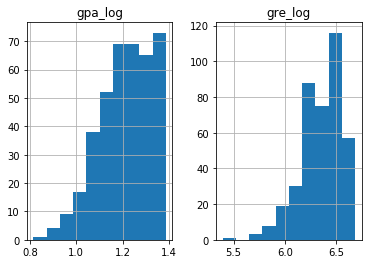

In [34]:
df[['gre_log','gpa_log']].hist()

###### Question 3: Replace missing values using multiple imputation methods